In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, PoissonRegressor, LinearRegression

import sys
sys.path.append('/home/rachel/Documents/lfp2spikes/modularized_code') 
from models.fit_model import MODEL_FITTING

In [21]:
model_mode = "stats"
fitter = MODEL_FITTING(model_mode)

In [3]:
buffer_size = 15
splits = [1,2]
bin_size = 1
c = (10, 1)
spike_type = "SUA"
spike_combo = "sumExt"
origin = 'zscored'

channels = "channels_5-40"

lfp_path = f'../data_prep/data/{spike_type}/{channels}/pat66_lfps{spike_type}_df_{origin}_c{c}_b{bin_size}'
spike_path = f'../data_prep/data/{spike_type}/{channels}/pat66_spikes{spike_type}_df_b{bin_size}_c{c}'

cv_df = fitter.load_split_data(
    splits, 
    lfp_path, 
    spike_path
)

In [10]:
cv_df = [
    (cv_df[0][0].iloc[0:3], 
    cv_df[0][1].iloc[0:3]), 
    (cv_df[1][0].iloc[0:3], 
    cv_df[1][1].iloc[0:3])
]

In [18]:
cv_df

[(                                            train_dt  \
  0  [[1.0161346120935357, 1.006932224764577, 1.010...   
  1  [[1.0161346120935357, 1.006932224764577, 1.010...   
  2  [[1.0161346120935357, 1.006932224764577, 1.010...   
  
                                                val_dt  \
  0  [[-0.3189738777850435, -0.3326966086405668, -0...   
  1  [[-0.3189738777850435, -0.3326966086405668, -0...   
  2  [[-0.3189738777850435, -0.3326966086405668, -0...   
  
                                               test_dt  
  0  [[0.0532494889743174, 0.04023735724268466, 0.0...  
  1  [[0.0532494889743174, 0.04023735724268466, 0.0...  
  2  [[0.0532494889743174, 0.04023735724268466, 0.0...  ,
                                              train_dt  \
  0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
  1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
  2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
  
                                                val_dt  \
  0  [0,

In [23]:
alphas = np.arange(0.001, 0.01, 0.001)
alphas = [0.0]
#param_grid = alphas 
param_grid = zip(alphas, np.ones_like(alphas)) 
path = f"../experiments/grid_search_alpha_L1wt/{model_mode}/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)



**** Performing CV for alpha 0.0 and L1_wt 1.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##


ValueError: NaN, inf or invalid value detected in weights, estimation infeasible.

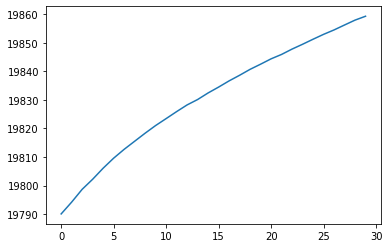

In [5]:
a = [19790.06154746782,
 19794.197050349718,
 19798.673854746172,
 19802.1977702891,
 19806.070472930438,
 19809.577361804157,
 19812.67020416771,
 19815.500269611064,
 19818.32260550103,
 19821.006038663938,
 19823.432194222427,
 19825.880224777713,
 19828.224685453664,
 19830.107909755126,
 19832.413844944418,
 19834.466167043585,
 19836.637433679043,
 19838.601635602266,
 19840.681901914522,
 19842.483149445543,
 19844.35645397964,
 19845.899840430502,
 19847.772781631706,
 19849.457895450516,
 19851.220464615,
 19852.927435786623,
 19854.47594791453,
 19856.20597338005,
 19857.912877619732,
 19859.269878240728]
plt.plot(a)

In [5]:
param_grid = [(0.0,0.0),(0.1,0.0)]
path = f"../experiments/grid_search_alpha_L1wt/gs_s{splits}_{channels}_{spike_type}_c{c}_b{bin_size}/"

fitter.grid_search_per_neuron( 
    param_grid, 
    cv_df, 
    path
)


**** Performing CV for alpha 0.0 and L1_wt 0.0 ****

>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 280949.9253117741
## VALIDATION ##
Log-cost: 56601.387191606846
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 133422.42489458408
## VALIDATION ##
Log-cost: 20126.618180846697
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 41563.08016181705
## VALIDATION ##
Log-cost: 7580.77803880455
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 31389.679274998387
## VALIDATION ##
Log-cost: 4599.276371205623
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 26555.173238802294
## VALIDATION ##
Log-cost: 5313.578116374968
## TESTING ##

>>>>>>>>> End Split 0


>>>>>>>>> Start Split 1

--- Unit 0 ---
## FITTING ##
Log-loss: 291612.5615093936
## VALIDATION ##
Log-cost: 54213.088983401525
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 125492.37996449077
## VALIDATION ##
Log-cost: 25970.526183270395
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 42463.1

[19015.667499539493, 51153.518857368465]

In [8]:
model_params = {"alpha": 0.0, "L1_wt": 0.0, "cnvrg_tol": 1E-8}
model_params["alpha"]

0.0

In [6]:
model_params = {"alpha": 0.0, "L1_wt": 0.0, "cnvrg_tol": 1E-8}
fitter.cross_validation_per_neuron(
    cv_df, 
    **model_params
)


>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 280949.9253117741
## VALIDATION ##
Log-cost: 56601.387191606846
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 133422.42489458408
## VALIDATION ##
Log-cost: 20126.618180846697
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 41563.08016181705
## VALIDATION ##
Log-cost: 7580.77803880455
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 31389.679274998387
## VALIDATION ##
Log-cost: 4599.276371205623
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 26555.173238802294
## VALIDATION ##
Log-cost: 5313.578116374968
## TESTING ##

>>>>>>>>> End Split 0


>>>>>>>>> Start Split 1

--- Unit 0 ---
## FITTING ##
Log-loss: 291612.5615093936
## VALIDATION ##
Log-cost: 54213.088983401525
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 125492.37996449077
## VALIDATION ##
Log-cost: 25970.526183270395
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 42463.18385093225
## VALIDATION ##
Log-cost: 5804.4341750259

(19015.667499539493,
 [[array([-2.82418148e+00, -4.05634659e-01,  1.09050381e-01,  9.77924784e-02,
           9.81099409e-02,  5.66561458e-02, -8.42164058e-02, -4.06988246e-02,
          -5.49941130e-02,  1.20639424e-01, -9.76081334e-02, -4.71723935e-02,
           1.05579868e-01,  1.40439669e-02,  5.54248603e-02, -1.31364181e-04,
           3.85926392e-02, -7.38112350e-02, -1.14540914e-03, -3.04688301e-02,
           5.67678285e-02,  2.74216583e-02,  8.14153007e-03, -5.90989668e-02,
           3.92766008e-02,  3.45709068e-02,  9.01780285e-02, -9.02759484e-02,
          -4.47406047e-02, -3.30254938e-01,  5.60988543e-01]),
   array([-3.82753680e+00, -9.02149600e-02,  2.87965398e-02,  5.65730960e-02,
           4.60833999e-02,  1.23760944e-02, -1.02290134e-03,  1.77236573e-02,
          -2.92912378e-02,  4.19164675e-02, -2.90738524e-02, -5.80298398e-02,
           3.40711496e-03,  1.16400445e-01, -1.24281258e-02,  8.29423572e-04,
           1.44534332e-02, -2.46595779e-02, -7.41168621e-0

In [4]:
model_params = {"alpha": 0.0, "L1_wt": 0.0, "cnvrg_tol": 1E-5}
fitter.cross_validation_per_neuron(
    cv_df, 
    **model_params
)


>>>>>>>>> Start Split 0

--- Unit 0 ---
## FITTING ##
Log-loss: 280949.9253117741
## VALIDATION ##
Log-cost: 56601.387191606846
## TESTING ##

--- Unit 1 ---
## FITTING ##
Log-loss: 133422.42489458408
## VALIDATION ##
Log-cost: 20126.618180846697
## TESTING ##

--- Unit 2 ---
## FITTING ##
Log-loss: 41563.08016181705
## VALIDATION ##
Log-cost: 7580.77803880455
## TESTING ##

--- Unit 3 ---
## FITTING ##
Log-loss: 31389.679274998387
## VALIDATION ##
Log-cost: 4599.276371205623
## TESTING ##

--- Unit 4 ---
## FITTING ##
Log-loss: 26555.173238802294
## VALIDATION ##
Log-cost: 5313.578116374968
## TESTING ##

>>>>>>>>> End Split 0



(18844.327579767734,
 [[array([-2.82418148e+00, -4.05634659e-01,  1.09050381e-01,  9.77924784e-02,
           9.81099409e-02,  5.66561458e-02, -8.42164058e-02, -4.06988246e-02,
          -5.49941130e-02,  1.20639424e-01, -9.76081334e-02, -4.71723935e-02,
           1.05579868e-01,  1.40439669e-02,  5.54248603e-02, -1.31364181e-04,
           3.85926392e-02, -7.38112350e-02, -1.14540914e-03, -3.04688301e-02,
           5.67678285e-02,  2.74216583e-02,  8.14153007e-03, -5.90989668e-02,
           3.92766008e-02,  3.45709068e-02,  9.01780285e-02, -9.02759484e-02,
          -4.47406047e-02, -3.30254938e-01,  5.60988543e-01]),
   array([-3.82753680e+00, -9.02149600e-02,  2.87965398e-02,  5.65730960e-02,
           4.60833999e-02,  1.23760944e-02, -1.02290134e-03,  1.77236573e-02,
          -2.92912378e-02,  4.19164675e-02, -2.90738524e-02, -5.80298398e-02,
           3.40711496e-03,  1.16400445e-01, -1.24281258e-02,  8.29423572e-04,
           1.44534332e-02, -2.46595779e-02, -7.41168621e-0